In [1]:
import numpy as np
from save_lv_data import derivative 
from scipy import integrate

In [2]:
# specify the LV parameters
alpha = 2/3 #mortality rate due to predators
beta = 4/3
delta = 1
gamma = 1

# specify the initial conditions and solve the ODE
x0 = 1
y0 = 1
Nt = 21
tmax = 16.
tspan = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]

# solve LV with a higher resolution tpsan
hr_tspan = np.linspace(0,tmax,1000)
res = integrate.odeint(derivative, X0, hr_tspan, args = (alpha, beta, delta, gamma))
x, y = res.T

In [3]:
X = np.load("data/lotka_volterra/lv_CV.npy")

In [4]:
import pysindy as ps
model = ps.SINDy(ps.STLSQ(),feature_library=ps.PolynomialLibrary(degree=2))
model.fit(X, tspan)
X_features = np.stack([ X[:,0] , X[:,0]**2,X[:,0]*X[:,1], X[:,1] ,  X[:,1]**2], axis = 1)

C = np.corrcoef(X_features.transpose())


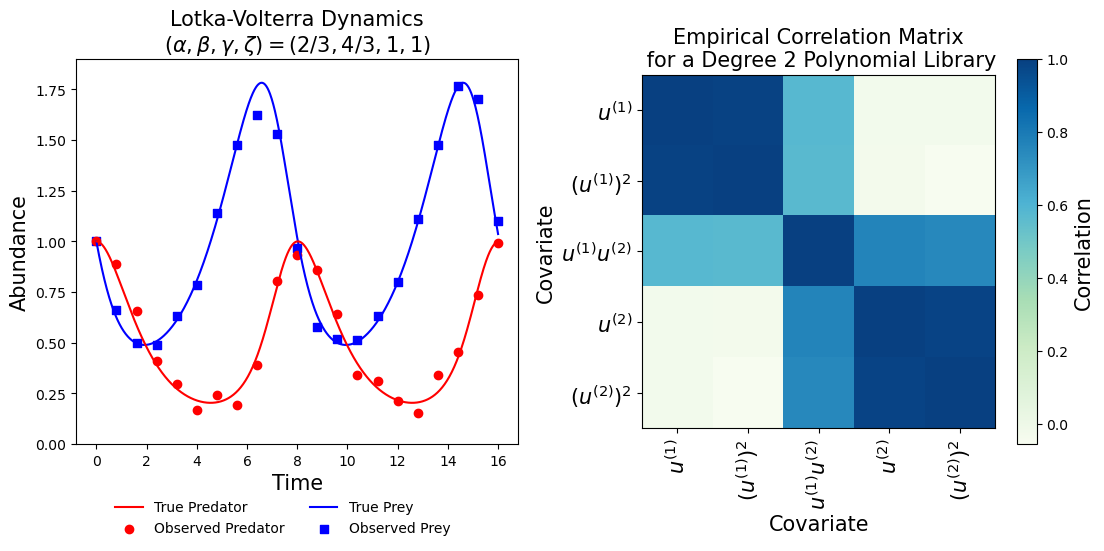

In [5]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(13)
plt.subplots_adjust(wspace = 0.28)

im = ax2.imshow(C, cmap = "GnBu")
cbar = fig.colorbar(im)
cbar.set_label("Correlation", size = 15)
ticks =["$1$", "$u^{(1)}$", "$(u^{(1)})^2$", "$u^{(1)}u^{(2)}$", "$u^{(2)}$", "$(u^{(2)})^2$"]

ax2.set_xticklabels(ticks,size =15, rotation = 90)
ax2.set_yticklabels(ticks, size = 15)
ax2.set_title("Empirical Correlation Matrix\n for a Degree 2 Polynomial Library", size = 15)
ax2.set_xlabel("Covariate", size = 15)
ax2.set_ylabel("Covariate", size = 15)

ax1.plot(hr_tspan, x, label = "True Prey" , c = "b")
ax1.scatter(tspan, X[:,0], label = "Observed Prey", c = "b", marker = "s")
ax1.plot(hr_tspan, y, label = "True Predator", c = "r")
ax1.scatter(tspan, X[:,1], label = "Observed Predator", c = "r")
ax1.set_xlabel("Time", size = 15)
ax1.set_ylabel("Abundance", size = 15)
ax1.set_ylim(0,1.9)
ax1.set_title("Lotka-Volterra Dynamics\n$(\\alpha,\\beta,\gamma,\zeta) = (2/3,4/3,1,1)$", size = 15)
ax1.legend(bbox_to_anchor =(0.5,-0.27), loc='lower center', mode = "expand", ncol = 2, frameon=False)
plt.savefig("figures/lv_vis.png", dpi = 300, bbox_inches = "tight")